# **Ridge Regression**

## Importing and Cleaning Dataset

Import for the project 

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Import the dataset and drop the first column because it was a repetition of the indexes

In [9]:
df = pd.read_csv("dataset.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Remove all the entries with 0 popularity to improve accuracy of the model. There were around 16k records with 0 popularity out of 116k total records (more than 10%) and they biased the model too much.

In [10]:
df = df[df['popularity'] != 0]
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Ridge Regression Implementation

### Functions definition

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import KFold

# Function for training the model. 
# Given the train set, target, predictors and the alpha value it computes and returns the B matrix (used for predicting values) and 
# the mean and standard deviation of the X matrix
def ridge_regression_fit(train, target, predictors, alpha):
    X = train[predictors].copy()
    y = train[target].copy()
    
    mean = X.mean()
    std = X.std()
    
    X = (X - mean) / std #standardization
    X["intercept"] = 1
    X = X[['intercept'] + predictors]
    
    penalty = alpha * np.identity(X.shape[1])
    penalty[0][0] = 0 #First element 0 by convention
    
    B = np.linalg.inv(X.T @ X + penalty) @ X.T @ y
    B.index = ["intercept"] + predictors
    
    return B, mean, std

# Function for testing the model. 
# Given the test set, predictors, the B matrix, the mean and the standard deviation it computes and returns the predictions
def ridge_regression_predict(test, predictors, mean, std, B):
    test_X = test[predictors]
    test_X = (test_X - mean) / std #standardization
    test_X["intercept"] = 1
    test_X = test_X[['intercept'] + predictors]
    
    predictions = test_X @ B
    return predictions

# Perform the K-fold Validation, train and test the model for each fold. For each fold the model is trained with different alpha 
# values and for each of these alphas it computes the Root Mean Squared Error
def k_fold_validation(df, target, predictors, k=5, a=-1):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    if a == -1:
        alphas = [10**i for i in range(-10,10)]
    else:
        alphas = [a]
    RMSEs = [[] for i in range(len(alphas))]
    MAEs = [[] for i in range(len(alphas))]
    R2s = [[] for i in range(len(alphas))]

    for train_index, test_index in kf.split(df):
        train_data = df.iloc[train_index]
        test_data = df.iloc[test_index]
        
        for i, alpha in enumerate(alphas):
            B, mean, std = ridge_regression_fit(train_data, target, predictors, alpha)
            pred = ridge_regression_predict(test_data, predictors, mean, std, B)
            RMSEs[i].append(np.sqrt(mean_squared_error(test_data[target], pred)))
            MAEs[i].append(mean_absolute_error(test_data[target], pred))
            R2s[i].append(r2_score(test_data[target], pred))
            
    MAEs_df = pd.DataFrame(np.array(MAEs), index=alphas, columns=['fold-1', 'fold-2', 'fold-3', 'fold-4', 'fold-5'])
    MAEs_df['mean'] = MAEs_df.mean(axis=1)

    RMSEs_df = pd.DataFrame(np.array(RMSEs), index=alphas, columns=['fold-1', 'fold-2', 'fold-3', 'fold-4', 'fold-5'])
    RMSEs_df['mean'] = RMSEs_df.mean(axis=1)
    
    R2s_df = pd.DataFrame(np.array(R2s), index=alphas, columns=['fold-1', 'fold-2', 'fold-3', 'fold-4', 'fold-5'])
    R2s_df['mean'] = R2s_df.mean(axis=1)

    return MAEs_df, RMSEs_df, R2s_df

In [12]:
results = []

def fill_results_array(name, alpha, RMSE, MAE, R2):
    results.append({"name": name,
                    "alpha": alpha,
                    "RMSE": RMSE,
                    "MAE": MAE,
                    "R2": R2
                   })

### Only Numerical Features

Defining the target

In [13]:
target = ['popularity']

Plotting the heatmap of the correlation matrix to see how labels are correlated between each others

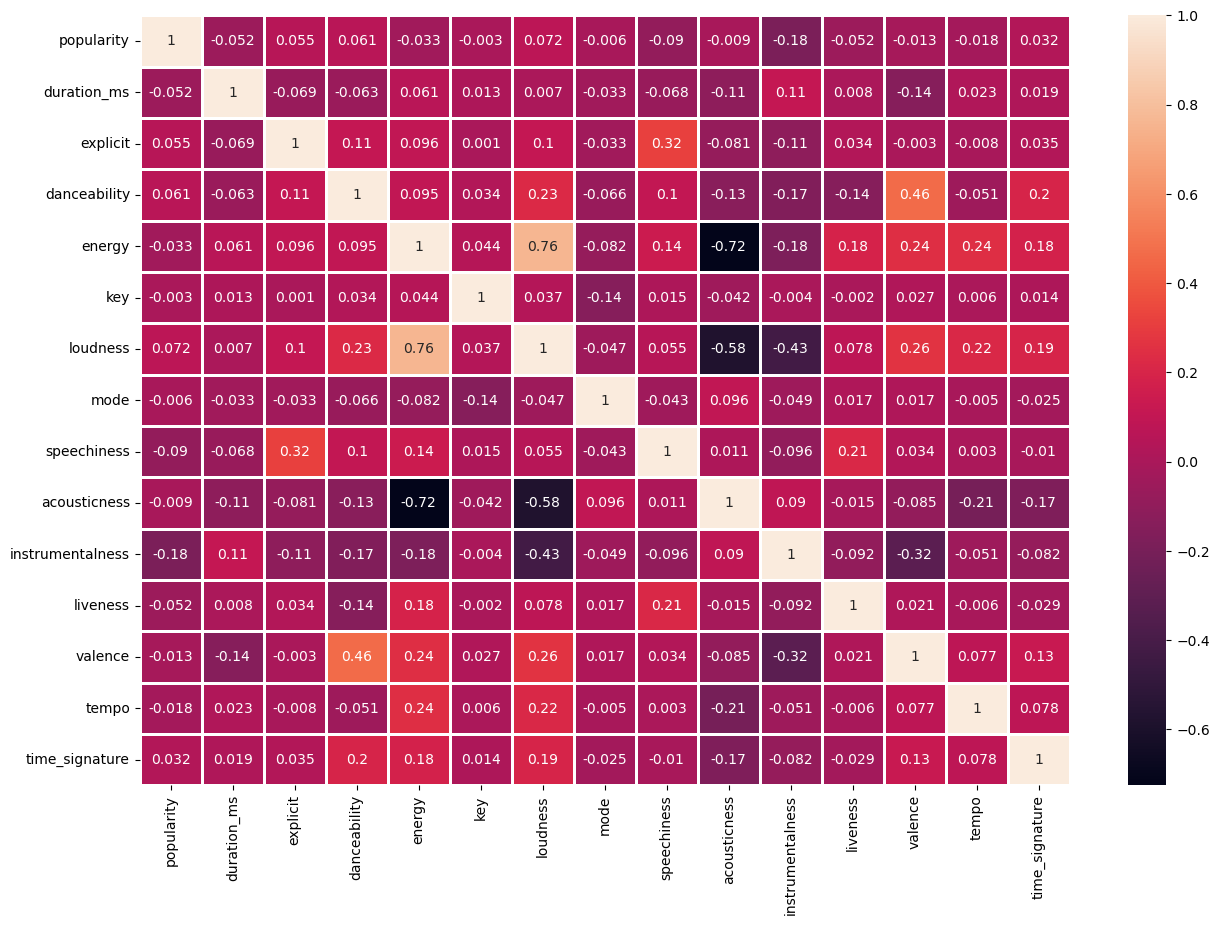

In [14]:
plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr().round(3), annot=True, linecolor="white", linewidths=1, xticklabels=1) ;
#plt.savefig('heatmap.png')

#### v1

In [15]:
predictors_NF = ['explicit', 'danceability', 'loudness', 'time_signature']

Train the model with all the numerical features in the dataset

In [18]:
MAEs, RMSEs, R2s = k_fold_validation(df, target, predictors_NF)
RMSEs

,fold-1,fold-2,fold-3,fold-4,fold-5,mean
1.000000e-10,19.230876,19.065474,18.988536,19.108969,19.168518,19.112475
1.000000e-09,19.230876,19.065474,18.988536,19.108969,19.168518,19.112475
1.000000e-08,19.230876,19.065474,18.988536,19.108969,19.168518,19.112475
1.000000e-07,19.230876,19.065474,18.988536,19.108969,19.168518,19.112475
1.000000e-06,19.230876,19.065474,18.988536,19.108969,19.168518,19.112475
1.000000e-05,19.230876,19.065474,18.988536,19.108969,19.168518,19.112475
1.000000e-04,19.230876,19.065474,18.988536,19.108969,19.168518,19.112475
1.000000e-03,19.230876,19.065474,18.988536,19.108969,19.168518,19.112475
1.000000e-02,19.230876,19.065474,18.988536,19.108969,19.168518,19.112475
1.000000e-01,19.230876,19.065474,18.988536,19.108969,19.168518,19.112475


In [19]:
best_alpha_NF = RMSEs["mean"].idxmin()
RMSE_NF = RMSEs["mean"].min()
best_alpha_NF, RMSE_NF

(1000.0, 19.112468098903577)

In [20]:
MAEs.loc[best_alpha_NF]['mean'], R2s.loc[best_alpha_NF]['mean']

(15.809020199939777, 0.009187319047863473)

In [21]:
fill_results_array("Numerical_v1", best_alpha_NF, RMSE_NF, MAEs.loc[best_alpha_NF]['mean'], R2s.loc[best_alpha_NF]['mean'])

#### v2

In [22]:
predictors_NF = ['explicit', 'danceability', 'loudness', 'time_signature', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']

In [23]:
MAEs, RMSEs, R2s = k_fold_validation(df, target, predictors_NF)
RMSEs

,fold-1,fold-2,fold-3,fold-4,fold-5,mean
1.000000e-10,18.824677,18.648402,18.567191,18.656688,18.724382,18.684268
1.000000e-09,18.824677,18.648402,18.567191,18.656688,18.724382,18.684268
1.000000e-08,18.824677,18.648402,18.567191,18.656688,18.724382,18.684268
1.000000e-07,18.824677,18.648402,18.567191,18.656688,18.724382,18.684268
1.000000e-06,18.824677,18.648402,18.567191,18.656688,18.724382,18.684268
1.000000e-05,18.824677,18.648402,18.567191,18.656688,18.724382,18.684268
1.000000e-04,18.824677,18.648402,18.567191,18.656688,18.724382,18.684268
1.000000e-03,18.824677,18.648402,18.567191,18.656688,18.724382,18.684268
1.000000e-02,18.824677,18.648402,18.567191,18.656688,18.724382,18.684268
1.000000e-01,18.824677,18.648402,18.567191,18.656688,18.724382,18.684268


In [24]:
best_alpha_NF = RMSEs["mean"].idxmin()
RMSE_NF = RMSEs["mean"].min()
best_alpha_NF, RMSE_NF

(100.0, 18.68426592273972)

In [25]:
MAEs.loc[best_alpha_NF]['mean'], R2s.loc[best_alpha_NF]['mean']

(15.34944714747169, 0.05308823633210071)

In [26]:
fill_results_array("Numerical_v2", best_alpha_NF, RMSE_NF, MAEs.loc[best_alpha_NF]['mean'], R2s.loc[best_alpha_NF]['mean'])

#### v3 (All numerical features)

In [27]:
predictors_NF = ['explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'key', 'time_signature', 'mode']

In [28]:
MAEs, RMSEs, R2s = k_fold_validation(df, target, predictors_NF)
RMSEs

,fold-1,fold-2,fold-3,fold-4,fold-5,mean
1.000000e-10,18.699062,18.505881,18.416004,18.524108,18.610640,18.551139
1.000000e-09,18.699062,18.505881,18.416004,18.524108,18.610640,18.551139
1.000000e-08,18.699062,18.505881,18.416004,18.524108,18.610640,18.551139
1.000000e-07,18.699062,18.505881,18.416004,18.524108,18.610640,18.551139
1.000000e-06,18.699062,18.505881,18.416004,18.524108,18.610640,18.551139
1.000000e-05,18.699062,18.505881,18.416004,18.524108,18.610640,18.551139
1.000000e-04,18.699062,18.505881,18.416004,18.524108,18.610640,18.551139
1.000000e-03,18.699062,18.505881,18.416004,18.524108,18.610640,18.551139
1.000000e-02,18.699062,18.505881,18.416004,18.524108,18.610640,18.551139
1.000000e-01,18.699062,18.505881,18.416004,18.524108,18.610640,18.551139


In [29]:
best_alpha_NF = RMSEs["mean"].idxmin()
RMSE_NF = RMSEs["mean"].min()
best_alpha_NF, RMSE_NF

(100.0, 18.551135409152103)

In [30]:
MAEs.loc[best_alpha_NF]['mean'], R2s.loc[best_alpha_NF]['mean']

(15.13028619890855, 0.06653770439748441)

In [31]:
fill_results_array("Numerical_v3", best_alpha_NF, RMSE_NF, MAEs.loc[best_alpha_NF]['mean'], R2s.loc[best_alpha_NF]['mean'])

### Track Genre One-Hot Encoding

In [32]:
dummies = pd.get_dummies(df.track_genre)
 
# Concatenate the dummies to original dataframe and removing original track_genre column
df_OHE = pd.concat([df, dummies], axis='columns')
df_OHE.drop(['track_genre'], axis='columns', inplace=True)

predictors_OHE = list(df_OHE.columns.values)[5:]

In [33]:
MAEs, RMSEs, R2s = k_fold_validation(df_OHE, target, predictors_OHE)
RMSEs

,fold-1,fold-2,fold-3,fold-4,fold-5,mean
1.000000e-10,15.313335,15.434464,15.102963,19.154962,15.661897,16.133524
1.000000e-09,15.102667,15.066366,14.992648,15.077834,15.133246,15.074552
1.000000e-08,15.093263,15.061836,14.993955,15.069668,15.126049,15.068954
1.000000e-07,15.093206,15.061770,14.993689,15.069547,15.125704,15.068783
1.000000e-06,15.093239,15.061774,14.993690,15.069516,15.125679,15.068780
1.000000e-05,15.093238,15.061775,14.993691,15.069517,15.125677,15.068779
1.000000e-04,15.093238,15.061775,14.993691,15.069517,15.125677,15.068780
1.000000e-03,15.093238,15.061775,14.993691,15.069517,15.125677,15.068780
1.000000e-02,15.093238,15.061775,14.993691,15.069517,15.125677,15.068780
1.000000e-01,15.093238,15.061775,14.993691,15.069517,15.125677,15.068780


In [34]:
best_alpha_NF_OHE = RMSEs["mean"].idxmin()
RMSE_NF_OHE = RMSEs["mean"].min()
best_alpha_NF_OHE, RMSE_NF_OHE

(100.0, 15.068751531600856)

In [35]:
R2s.loc[best_alpha_NF_OHE]['mean'], MAEs.loc[best_alpha_NF_OHE]['mean']

(0.3840841113710446, 10.809267879626095)

In [36]:
fill_results_array("Track Genre OHE", best_alpha_NF_OHE, RMSE_NF_OHE, MAEs.loc[best_alpha_NF_OHE]['mean'], R2s.loc[best_alpha_NF_OHE]['mean'])

### Target Encoding on Track Genre

In [37]:
df_genre_target = df.copy()
df_genre_target["track_genre_encoded"] = df_genre_target.groupby("track_genre")["popularity"].transform("mean")
df_genre_target.drop(['track_genre'], axis='columns', inplace=True)

predictors_TE = list(df_genre_target.columns.values)[5:]

In [38]:
MAEs, RMSEs, R2s = k_fold_validation(df_genre_target, target, predictors_TE)
RMSEs

,fold-1,fold-2,fold-3,fold-4,fold-5,mean
1.000000e-10,15.091065,15.049601,14.995723,15.065899,15.135486,15.067555
1.000000e-09,15.091065,15.049601,14.995723,15.065899,15.135486,15.067555
1.000000e-08,15.091065,15.049601,14.995723,15.065899,15.135486,15.067555
1.000000e-07,15.091065,15.049601,14.995723,15.065899,15.135486,15.067555
1.000000e-06,15.091065,15.049601,14.995723,15.065899,15.135486,15.067555
1.000000e-05,15.091065,15.049601,14.995723,15.065899,15.135486,15.067555
1.000000e-04,15.091065,15.049601,14.995723,15.065899,15.135486,15.067555
1.000000e-03,15.091065,15.049601,14.995723,15.065899,15.135486,15.067555
1.000000e-02,15.091065,15.049601,14.995723,15.065899,15.135486,15.067555
1.000000e-01,15.091065,15.049601,14.995723,15.065899,15.135486,15.067555


In [39]:
best_alpha_NF_OHE = RMSEs["mean"].idxmin()
RMSE_NF_OHE = RMSEs["mean"].min()
best_alpha_NF_OHE, RMSE_NF_OHE

(10.0, 15.06755450522287)

In [40]:
R2s.loc[best_alpha_NF_OHE]['mean'], MAEs.loc[best_alpha_NF_OHE]['mean']

(0.3841819559439663, 10.79108857346655)

In [41]:
fill_results_array("Track Genre TE", best_alpha_NF_OHE, RMSE_NF_OHE, MAEs.loc[best_alpha_NF_OHE]['mean'], R2s.loc[best_alpha_NF_OHE]['mean'])

### Target Encoding on artists

In [42]:
df_target = df_OHE.copy()
df_target["artist_encoded"] = df_target.groupby("artists")["popularity"].transform("mean")
df_target.drop(['artists'], axis='columns', inplace=True)

predictors_TE = list(df_target.columns.values)[5:]

In [43]:
MAEs, RMSEs, R2s = k_fold_validation(df_target, target, predictors_TE)
RMSEs

,fold-1,fold-2,fold-3,fold-4,fold-5,mean
1.000000e-10,9.759426,9.984832,9.412235,15.728188,10.367345,11.050405
1.000000e-09,9.302069,9.174185,9.300055,9.246200,9.369276,9.278357
1.000000e-08,9.295687,9.158937,9.294506,9.235162,9.353741,9.267607
1.000000e-07,9.295372,9.158663,9.294316,9.234669,9.353717,9.267347
1.000000e-06,9.295352,9.158682,9.294283,9.234721,9.353688,9.267345
1.000000e-05,9.295356,9.158685,9.294279,9.234724,9.353687,9.267346
1.000000e-04,9.295356,9.158685,9.294279,9.234723,9.353687,9.267346
1.000000e-03,9.295356,9.158685,9.294279,9.234723,9.353687,9.267346
1.000000e-02,9.295356,9.158685,9.294279,9.234723,9.353687,9.267346
1.000000e-01,9.295356,9.158686,9.294279,9.234724,9.353687,9.267346


In [44]:
best_alpha_NF_OHE_TE = RMSEs["mean"].idxmin()
RMSE_NF_OHE_TE = RMSEs["mean"].min()
best_alpha_NF_OHE_TE, RMSE_NF_OHE_TE

(10.0, 9.267343544098825)

In [45]:
R2s.loc[best_alpha_NF_OHE_TE]['mean'], MAEs.loc[best_alpha_NF_OHE_TE]['mean']

(0.7670314658578784, 4.872011489222485)

In [46]:
fill_results_array("Artists TE", best_alpha_NF_OHE_TE, RMSE_NF_OHE_TE, MAEs.loc[best_alpha_NF_OHE_TE]['mean'], R2s.loc[best_alpha_NF_OHE_TE]['mean'])

In [48]:
MAEs, RMSEs, R2s = k_fold_validation(df_target, target, predictors_TE, a=10)

In [49]:
result_df = pd.DataFrame(results)
result_df

,name,alpha,RMSE,MAE,R2
0,Numerical_v1,1000.0,19.112468,15.809020,0.009187
1,Numerical_v2,100.0,18.684266,15.349447,0.053088
2,Numerical_v3,100.0,18.551135,15.130286,0.066538
3,Track Genre OHE,100.0,15.068752,10.809268,0.384084
4,Track Genre TE,10.0,15.067555,10.791089,0.384182
5,Artists TE,10.0,9.267344,4.872011,0.767031
